In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bearing-data/B021_2.mat
/kaggle/input/bearing-data/B028_3.mat
/kaggle/input/bearing-data/IR007_3.mat
/kaggle/input/bearing-data/IR014_3.mat
/kaggle/input/bearing-data/OR00712_2.mat
/kaggle/input/bearing-data/IR028_2.mat
/kaggle/input/bearing-data/B014_3.mat
/kaggle/input/bearing-data/IR014_0.mat
/kaggle/input/bearing-data/IR007_2.mat
/kaggle/input/bearing-data/OR0073_1.mat
/kaggle/input/bearing-data/Normal_3.mat
/kaggle/input/bearing-data/B021_1.mat
/kaggle/input/bearing-data/B028_1.mat
/kaggle/input/bearing-data/IR014_1.mat
/kaggle/input/bearing-data/Normal_1.mat
/kaggle/input/bearing-data/OR0076_1.mat
/kaggle/input/bearing-data/B007_1.mat
/kaggle/input/bearing-data/B014_0.mat
/kaggle/input/bearing-data/OR0146_2.mat
/kaggle/input/bearing-data/B014_1.mat
/kaggle/input/bearing-data/OR0216_3.mat
/kaggle/input/bearing-data/B028_0.mat
/kaggle/input/bearing-data/OR02112_2.mat
/kaggle/input/bearing-data/B007_3.mat
/kaggle/input/bearing-data/OR0146_0.mat
/kaggle/input/bearing-da

Fixed masking and gaussian noise

2025-07-06 21:54:30.360602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751838870.537093      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751838870.583351      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
100%|██████████| 62/62 [00:03<00:00, 19.36it/s]
I0000 00:00:1751838885.793501      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Final dataset:
Total samples: 576
Image shape: (128, 128, 1)
Label distribution: {0: 112, 1: 120, 2: 216, 3: 128}


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,288,516 (16.36 MB)

 Trainable params: 4,288,068 (16.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/60


I0000 00:00:1751838890.734357      97 service.cc:148] XLA service 0x7895640116e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751838890.735018      97 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751838891.139402      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3609 - loss: 7.6777

I0000 00:00:1751838894.627834      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 385ms/step - accuracy: 0.3731 - loss: 7.4650 - val_accuracy: 0.3478 - val_loss: 18.1138
Epoch 2/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7575 - loss: 0.9678 - val_accuracy: 0.3478 - val_loss: 16.6568
Epoch 3/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8622 - loss: 0.3605 - val_accuracy: 0.3478 - val_loss: 15.3506
Epoch 4/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8502 - loss: 0.3524 - val_accuracy: 0.3478 - val_loss: 11.1614
Epoch 5/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8407 - loss: 0.3470 - val_accuracy: 0.3478 - val_loss: 8.3314
Epoch 6/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8709 - loss: 0.2450 - val_accuracy: 0.3478 - val_loss: 6.8297
Epoch 7/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9042 - loss: 0.1958 - val_accuracy: 0.3478 - val_loss: 6.4569
Epoch 8/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9260 - loss: 0.1784 - val_accuracy: 0.3478 - val_lo

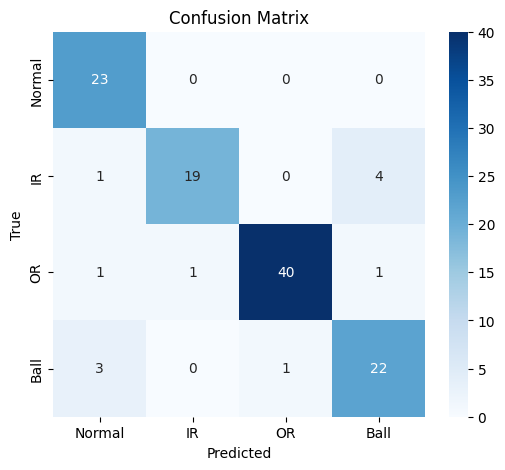

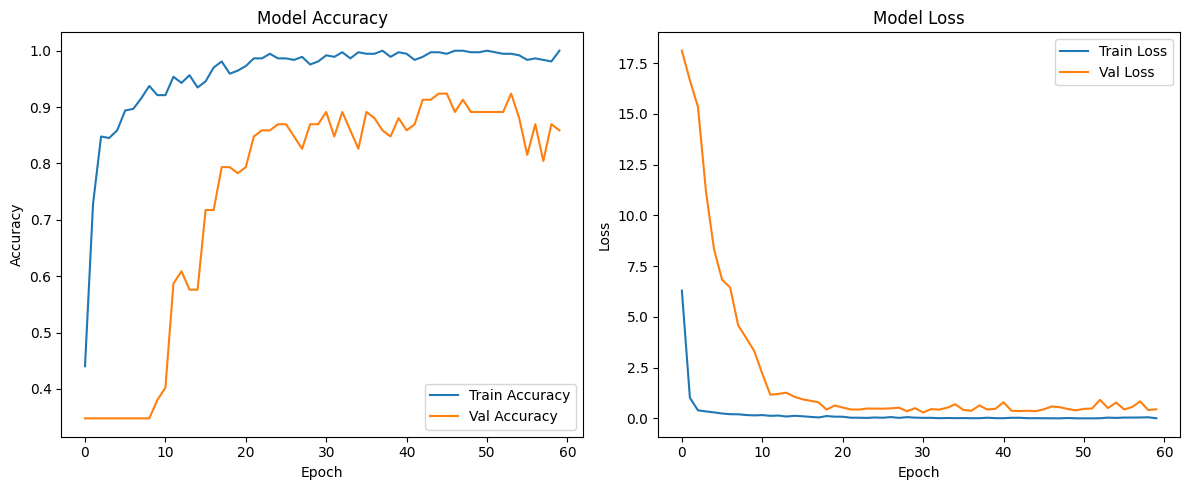

In [3]:
import numpy as np
import pandas as pd
import os
import glob
from tqdm import tqdm
from scipy.io import loadmat
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# --- Config ---
sampling_rate = 12000
window_sec = 5
out_shape = (128, 128)
data_path = "/kaggle/input/bearing-data"

# --- Label Mapper ---
def classify_file(filename):
    if "IR" in filename: return 1
    if "OR" in filename: return 2
    if "B0" in filename: return 3
    if "Normal" in filename or "97" in filename: return 0
    return -1

# --- Segment Signal ---
def segment_signal(signal, fs, window_sec):
    win_len = fs * window_sec
    return [signal[i:i+win_len] for i in range(0, len(signal), win_len) if len(signal[i:i+win_len]) == win_len]

# --- Spectrogram Conversion ---
def segment_to_spectrogram(segment, fs, out_shape):
    f, t, Sxx = spectrogram(segment, fs, nperseg=256, noverlap=128)
    Sxx_db = 10 * np.log10(Sxx + 1e-8)
    h, w = min(Sxx_db.shape[0], out_shape[0]), min(Sxx_db.shape[1], out_shape[1])
    out = np.zeros(out_shape)
    out[:h, :w] = Sxx_db[:h, :w]
    return out

# --- Augmentation Helpers ---
def amplitude_scaling(seg, scale_range=(0.8, 1.2)):
    scale = np.random.uniform(*scale_range)
    return seg * scale
def frequency_masking(spec, mask_height=100):
    spec = spec.copy()
    f0 = np.random.randint(0, spec.shape[0] - mask_height)
    spec[f0:f0 + mask_height, :] = np.min(spec)  # or set to 0
    return spec


# --- Load and Augment Dataset ---
X, y = [], []
mat_files = glob.glob(os.path.join(data_path, "*.mat"))

for filepath in tqdm(mat_files):
    try:
        label = classify_file(os.path.basename(filepath))
        if label == -1:
            continue

        data = loadmat(filepath)
        key = [k for k in data.keys() if "DE_time" in k][0]
        signal = data[key].ravel()
        segments = segment_signal(signal, sampling_rate, window_sec)

        for seg in segments:
            base_spec = segment_to_spectrogram(seg, sampling_rate, out_shape)

            # Original
            X.append(base_spec)
            y.append(label)

            # Gaussian Noise
            noisy = seg + np.random.normal(0, 0.08, size=seg.shape)
            X.append(segment_to_spectrogram(noisy, sampling_rate, out_shape))
            y.append(label)

            # Amplitude Scaled
            scaled = amplitude_scaling(seg)
            X.append(segment_to_spectrogram(scaled, sampling_rate, out_shape))
            y.append(label)

            # Frequency Masking
            masked_spec = frequency_masking(base_spec)
            X.append(masked_spec)
            y.append(label)

    except Exception as e:
        print(f"Error processing {filepath}: {e}")

X = np.array(X)[..., np.newaxis]
y = np.array(y)

print("Final dataset:")
print("Total samples:", X.shape[0])
print("Image shape:", X.shape[1:])
print("Label distribution:", pd.Series(y).value_counts().sort_index().to_dict())

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- Compute Class Weights ---
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# --- CNN Model Definition ---
model = tf.keras.Sequential([
    tf.keras.Input(shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# --- Train Model ---
history = model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weight_dict,
                    verbose=1)

# --- Save Model ---
model.save("bearing_fault_cnn_model2.h5")  # Or use "bearing_fault_cnn_model" for SavedModel format

# --- Evaluate Model ---
y_pred = model.predict(X_test).argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)

print("\nTest Accuracy:", round(accuracy, 4))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'IR', 'OR', 'Ball'],
            yticklabels=['Normal', 'IR', 'OR', 'Ball'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# --- Training History Plots ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Rms_scaled gaussian noise and variable masking with spectrun size as 256*256


100%|██████████| 62/62 [00:01<00:00, 38.44it/s]


Final dataset:
Total samples: 576
Image shape: (256, 256, 1)
Label distribution: {0: 112, 1: 120, 2: 216, 3: 128}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,871,428 (64.36 MB)

 Trainable params: 16,870,980 (64.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 626ms/step - accuracy: 0.3249 - loss: 31.7283 - val_accuracy: 0.3913 - val_loss: 2.0508
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5239 - loss: 4.4860 - val_accuracy: 0.3478 - val_loss: 1.8162
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6323 - loss: 1.8545 - val_accuracy: 0.5000 - val_loss: 1.6452
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7101 - loss: 1.6425 - val_accuracy: 0.3696 - val_loss: 1.4630
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7177 - loss: 1.1458 - val_accuracy: 0.5543 - val_loss: 1.4084
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7640 - loss: 1.0218 - val_accuracy: 0.2717 - val_loss: 1.2837
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7678 - loss: 0.5299 - val_accuracy: 0.4783 - val_loss: 1.2873
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7491 - loss: 0.6349 - val_accuracy:

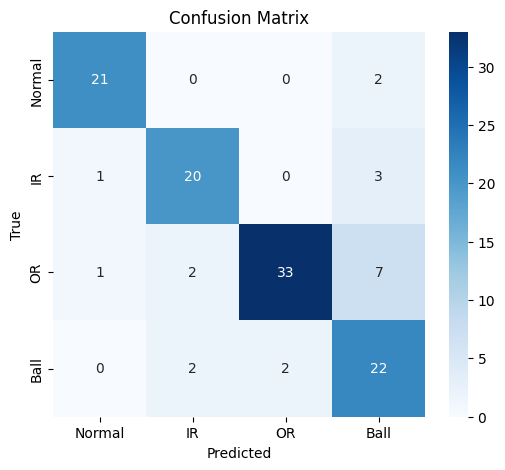

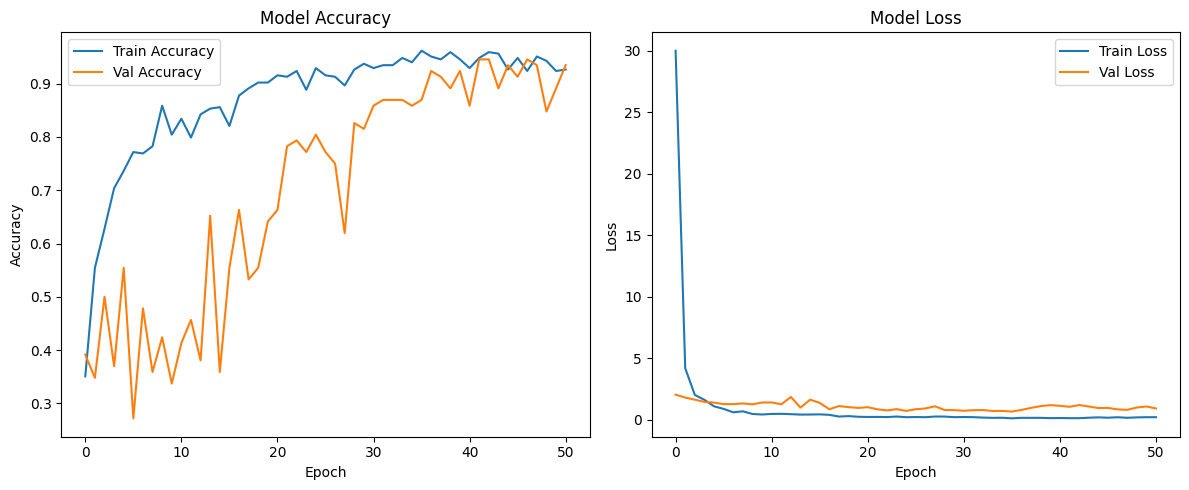

In [4]:
import numpy as np
import pandas as pd
import os
import glob
from tqdm import tqdm
from scipy.io import loadmat
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# --- Config ---
sampling_rate = 12000
window_sec = 5
out_shape = (256, 256)
data_path = "/kaggle/input/bearing-data"

# --- Label Mapper ---
def classify_file(filename):
    if "IR" in filename: return 1
    if "OR" in filename: return 2
    if "B0" in filename: return 3
    if "Normal" in filename or "97" in filename: return 0
    return -1

# --- Segment Signal ---
def segment_signal(signal, fs, window_sec):
    win_len = fs * window_sec
    return [signal[i:i+win_len] for i in range(0, len(signal), win_len) if len(signal[i:i+win_len]) == win_len]

# --- Spectrogram Conversion ---
def segment_to_spectrogram(segment, fs, out_shape):
    f, t, Sxx = spectrogram(segment, fs, nperseg=256, noverlap=128)
    Sxx_db = 10 * np.log10(Sxx + 1e-8)
    h, w = min(Sxx_db.shape[0], out_shape[0]), min(Sxx_db.shape[1], out_shape[1])
    out = np.zeros(out_shape)
    out[:h, :w] = Sxx_db[:h, :w]
    return out
def add_rms_scaled_noise(signal, noise_ratio=0.1):
    rms = np.sqrt(np.mean(signal**2))
    noise = np.random.normal(0, noise_ratio * rms, size=signal.shape)
    return signal + noise

# --- Augmentation Helpers ---
def amplitude_scaling(seg, scale_range=(0.8,1.2)):
    scale = np.random.uniform(*scale_range)
    return seg * scale
    
def frequency_masking(spec, num_masks=1, freq_masking_max_percentage=0.15):
    spec = spec.copy()
    num_freqs = spec.shape[0]
    for _ in range(num_masks):
        f = int(np.random.uniform(0.0, freq_masking_max_percentage) * num_freqs)
        f0 = np.random.randint(0, num_freqs - f)
        spec[f0:f0 + f, :] = 0
    return spec


# --- Load and Augment Dataset ---
X, y = [], []
mat_files = glob.glob(os.path.join(data_path, "*.mat"))

for filepath in tqdm(mat_files):
    try:
        label = classify_file(os.path.basename(filepath))
        if label == -1:
            continue

        data = loadmat(filepath)
        key = [k for k in data.keys() if "DE_time" in k][0]
        signal = data[key].ravel()
        segments = segment_signal(signal, sampling_rate, window_sec)

        for seg in segments:
            base_spec = segment_to_spectrogram(seg, sampling_rate, out_shape)

            # Original
            X.append(base_spec)
            y.append(label)

            # Gaussian Noise
            noisy = add_rms_scaled_noise(seg, noise_ratio=0.1)

            X.append(segment_to_spectrogram(noisy, sampling_rate, out_shape))
            y.append(label)

            # Amplitude Scaled
            scaled = amplitude_scaling(seg)
            X.append(segment_to_spectrogram(scaled, sampling_rate, out_shape))
            y.append(label)

            # Frequency Masking
            masked_spec = frequency_masking(base_spec)
            X.append(masked_spec)
            y.append(label)

    except Exception as e:
        print(f"Error processing {filepath}: {e}")

X = np.array(X)[..., np.newaxis]
y = np.array(y)

print("Final dataset:")
print("Total samples:", X.shape[0])
print("Image shape:", X.shape[1:])
print("Label distribution:", pd.Series(y).value_counts().sort_index().to_dict())

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- Compute Class Weights ---
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# --- CNN Model Definition ---
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# --- Train Model ---
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weight_dict,
                    verbose=1,
                    callbacks=[early_stop])

# --- Save Model ---
model.save("bearing_fault_cnn_model2.h5")  # Or use "bearing_fault_cnn_model" for SavedModel format

# --- Evaluate Model ---
y_pred = model.predict(X_test).argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)

print("\nTest Accuracy:", round(accuracy, 4))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'IR', 'OR', 'Ball'],
            yticklabels=['Normal', 'IR', 'OR', 'Ball'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# --- Training History Plots ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Final model


100%|██████████| 62/62 [00:01<00:00, 45.98it/s]


Final dataset:
Total samples: 576
Image shape: (128, 128, 1)
Label distribution: {0: 112, 1: 120, 2: 216, 3: 128}


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,288,516 (16.36 MB)

 Trainable params: 4,288,068 (16.36 MB)

 Non-trainable params: 448 (1.75 KB)


📋 Logging Epoch 1 batch sample sources...
✅ Saved: epoch_logs/epoch_1_samples.csv
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - accuracy: 0.4186 - loss: 6.1172 - val_accuracy: 0.1957 - val_loss: 16.2269

📋 Logging Epoch 2 batch sample sources...
✅ Saved: epoch_logs/epoch_2_samples.csv
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6644 - loss: 2.1997 - val_accuracy: 0.3478 - val_loss: 10.3678

📋 Logging Epoch 3 batch sample sources...
✅ Saved: epoch_logs/epoch_3_samples.csv
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8641 - loss: 0.4691 - val_accuracy: 0.3587 - val_loss: 5.4036

📋 Logging Epoch 4 batch sample sources...
✅ Saved: epoch_logs/epoch_4_samples.csv
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9280 - loss: 0.2279 - val_accuracy: 0.3696 - val_loss: 5.2174

📋 Logging Epoch 5 batch sample sources...
✅ Saved: epoch_logs/epoch_5_samples.csv
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9586

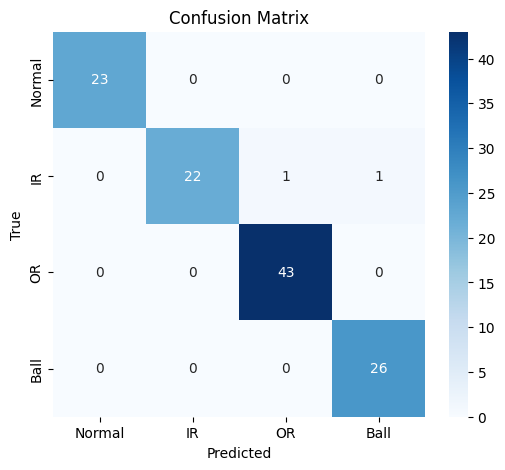

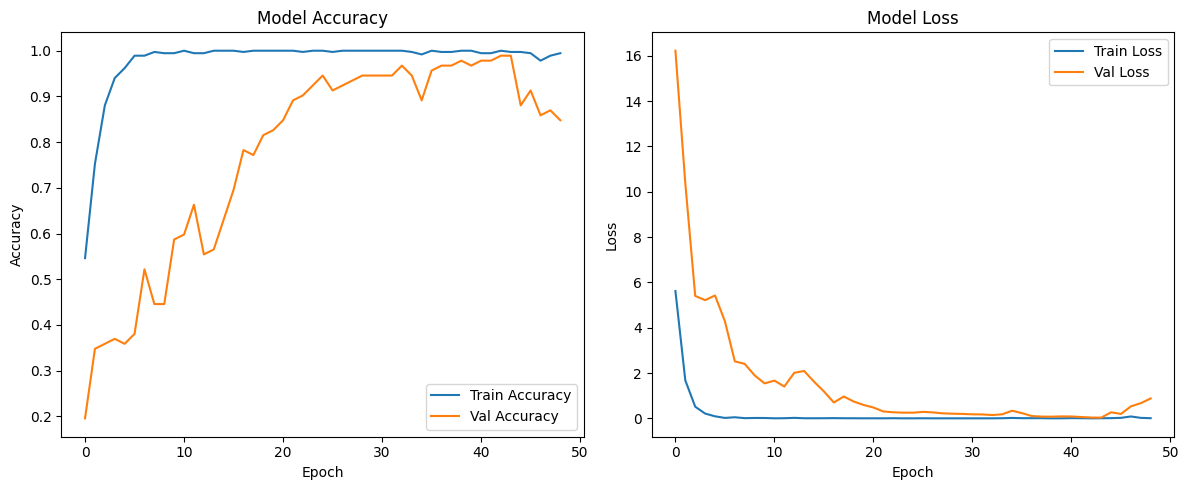

In [22]:
import numpy as np
import pandas as pd
import os
import glob
from tqdm import tqdm
from scipy.io import loadmat
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# --- Config ---
sampling_rate = 12000
window_sec = 5
out_shape = (128, 128)
data_path = "/kaggle/input/bearing-data"

# --- Label Mapper ---
def classify_file(filename):
    if "IR" in filename: return 1
    if "OR" in filename: return 2
    if "B0" in filename: return 3
    if "Normal" in filename or "97" in filename: return 0
    return -1

# --- Segment Signal ---
def segment_signal(signal, fs, window_sec):
    win_len = fs * window_sec
    return [signal[i:i+win_len] for i in range(0, len(signal), win_len) if len(signal[i:i+win_len]) == win_len]

# --- Spectrogram Conversion ---
def segment_to_spectrogram(segment, fs, out_shape):
    f, t, Sxx = spectrogram(segment, fs, nperseg=256, noverlap=128)
    Sxx_db = 10 * np.log10(Sxx + 1e-8)
    h, w = min(Sxx_db.shape[0], out_shape[0]), min(Sxx_db.shape[1], out_shape[1])
    out = np.zeros(out_shape)
    out[:h, :w] = Sxx_db[:h, :w]
    return out

def add_rms_scaled_noise(signal, noise_ratio=0.2):
    rms = np.sqrt(np.mean(signal**2))
    noise = np.random.normal(0, noise_ratio * rms, size=signal.shape)
    return signal + noise

# --- Augmentation Helpers ---
def amplitude_scaling(seg, scale_range=(0.4, 2.0)):
    scale = np.random.uniform(*scale_range)
    return seg * scale
    
def frequency_masking(spec, num_masks=1, freq_masking_max_percentage=0.15):
    spec = spec.copy()
    num_freqs = spec.shape[0]
    for _ in range(num_masks):
        f = int(np.random.uniform(0.0, freq_masking_max_percentage) * num_freqs)
        f0 = np.random.randint(0, num_freqs - f)
        spec[f0:f0 + f, :] = 0
    return spec

# --- Load and Augment Dataset ---
X, y, sources = [], [], []
mat_files = glob.glob(os.path.join(data_path, "*.mat"))

for filepath in tqdm(mat_files):
    try:
        label = classify_file(os.path.basename(filepath))
        if label == -1:
            continue

        data = loadmat(filepath)
        key = [k for k in data.keys() if "DE_time" in k][0]
        signal = data[key].ravel()
        segments = segment_signal(signal, sampling_rate, window_sec)

        for seg in segments:
            base_spec = segment_to_spectrogram(seg, sampling_rate, out_shape)

            # Original
            X.append(base_spec)
            y.append(label)
            sources.append(os.path.basename(filepath))
            
            # Gaussian Noise
            noisy = add_rms_scaled_noise(seg, noise_ratio=0.1)
            X.append(segment_to_spectrogram(noisy, sampling_rate, out_shape))
            y.append(label)
            sources.append(os.path.basename(filepath))
            
            # Amplitude Scaled
            scaled = amplitude_scaling(seg)
            X.append(segment_to_spectrogram(scaled, sampling_rate, out_shape))
            y.append(label)
            sources.append(os.path.basename(filepath))
            
            # Frequency Masking
            masked_spec = frequency_masking(base_spec)
            X.append(masked_spec)
            y.append(label)
            sources.append(os.path.basename(filepath))

    except Exception as e:
        print(f"Error processing {filepath}: {e}")

X = np.array(X)[..., np.newaxis]
y = np.array(y)
sources = np.array(sources)

print("Final dataset:")
print("Total samples:", X.shape[0])
print("Image shape:", X.shape[1:])
print("Label distribution:", pd.Series(y).value_counts().sort_index().to_dict())

# --- Train/Test Split ---
X_train, X_test, y_train, y_test, sources_train, sources_test = train_test_split(
    X, y, sources, test_size=0.2, stratify=y, random_state=42)

# --- Compute Class Weights ---
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# --- Callback to Log Sample Sources per Epoch ---
class EpochSampleLogger(tf.keras.callbacks.Callback):
    def __init__(self, sources_train, batch_size, output_dir="epoch_logs", max_epochs=5):
        super().__init__()
        self.sources_train = sources_train
        self.batch_size = batch_size
        self.output_dir = output_dir
        self.max_epochs = max_epochs
        os.makedirs(self.output_dir, exist_ok=True)

    def on_epoch_begin(self, epoch, logs=None):
        if epoch >= self.max_epochs:
            return

        print(f"\n📋 Logging Epoch {epoch+1} batch sample sources...")

        num_samples = len(self.sources_train)
        num_batches = int(np.ceil(num_samples / self.batch_size))

        rows = []
        for i in range(num_batches):
            batch_sources = self.sources_train[i * self.batch_size : (i + 1) * self.batch_size]
            for j, src in enumerate(batch_sources):
                rows.append({
                    "epoch": epoch + 1,
                    "batch": i + 1,
                    "sample_index": i * self.batch_size + j,
                    "source_file": src
                })

        df = pd.DataFrame(rows)
        df.to_csv(f"{self.output_dir}/epoch_{epoch+1}_samples.csv", index=False)
        print(f"✅ Saved: {self.output_dir}/epoch_{epoch+1}_samples.csv")

# --- CNN Model Definition ---
model = tf.keras.Sequential([
    tf.keras.Input(shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# --- Train Model ---
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
logger_callback = EpochSampleLogger(sources_train, batch_size=32)

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weight_dict,
                    verbose=1,
                    callbacks=[early_stop, logger_callback])

# --- Save Model ---
model.save("bearing_fault_cnn_model_new_7.h5")

# --- Evaluate Model ---
y_pred = model.predict(X_test).argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)

print("\nTest Accuracy:", round(accuracy, 4))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'IR', 'OR', 'Ball'],
            yticklabels=['Normal', 'IR', 'OR', 'Ball'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# --- Training History Plots ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


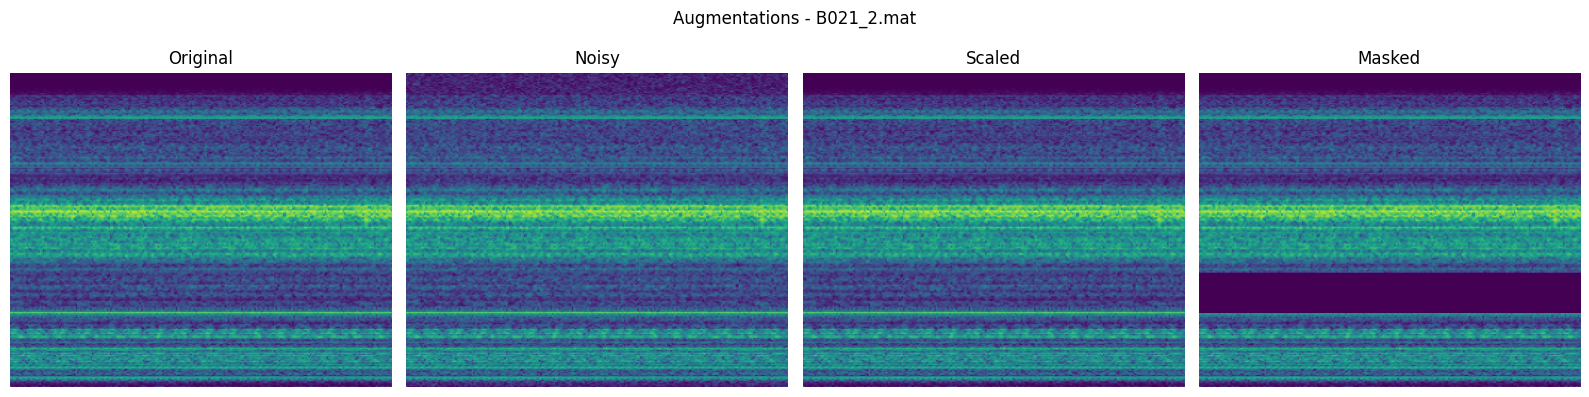

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import spectrogram
import cv2
import os

# --- Config ---
sampling_rate = 12000
window_sec = 5
out_shape = (256, 256)
mat_file_path = "/kaggle/input/bearing-data/B021_2.mat"  # <--- Change if needed

# --- Helpers ---
def segment_signal(signal, fs, window_sec):
    win_len = fs * window_sec
    return [signal[i:i+win_len] for i in range(0, len(signal), win_len) if len(signal[i:i+win_len]) == win_len]

def segment_to_spectrogram(segment, fs, out_shape):
    f, t, Sxx = spectrogram(segment, fs, nperseg=512, noverlap=256)
    Sxx_db = 10 * np.log10(Sxx + 1e-8)
    Sxx_db = (Sxx_db - np.min(Sxx_db)) / (np.max(Sxx_db) - np.min(Sxx_db))
    return cv2.resize(Sxx_db, out_shape, interpolation=cv2.INTER_AREA)

def add_rms_scaled_noise(signal, noise_ratio=0.1):
    rms = np.sqrt(np.mean(signal**2))
    noise = np.random.normal(0, noise_ratio * rms, size=signal.shape)
    return signal + noise

def amplitude_scaling(seg, scale_range=(0.8, 1.2)):
    scale = np.random.uniform(*scale_range)
    return seg * scale

def frequency_masking(spec, num_masks=1, freq_masking_max_percentage=0.2):
    spec = spec.copy()
    num_freqs = spec.shape[0]
    for _ in range(num_masks):
        f = int(np.random.uniform(0.0, freq_masking_max_percentage) * num_freqs)
        f0 = np.random.randint(0, num_freqs - f)
        spec[f0:f0 + f, :] = 0
    return spec

# --- Load and Segment Signal ---
mat = loadmat(mat_file_path)
key = [k for k in mat if "DE_time" in k][0]
signal = mat[key].ravel()
segment = segment_signal(signal, sampling_rate, window_sec)[0]

# --- Augmentations ---
original = segment_to_spectrogram(segment, sampling_rate, out_shape)
noisy = segment_to_spectrogram(add_rms_scaled_noise(segment), sampling_rate, out_shape)
scaled = segment_to_spectrogram(amplitude_scaling(segment), sampling_rate, out_shape)
masked = frequency_masking(original)

# --- Plot ---
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
titles = ['Original', 'Noisy', 'Scaled', 'Masked']
for i, img in enumerate([original, noisy, scaled, masked]):
    axs[i].imshow(img, cmap='viridis', origin='lower', aspect='auto')
    axs[i].set_title(titles[i])
    axs[i].axis('off')
plt.suptitle(f"Augmentations - {os.path.basename(mat_file_path)}")
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import pandas as pd
import glob
import os
from tqdm import tqdm
from scipy.io import loadmat
from scipy.signal import periodogram
from scipy.stats import kurtosis, skew

# --- Config ---
sampling_rate = 12000
window_sec = 5
data_path = "/kaggle/input/bearing-data"

# --- Label Mapper ---
def classify_file(filename):
    if "IR" in filename: return "IR"
    if "OR" in filename: return "OR"
    if "B0" in filename: return "Ball"
    if "Normal" in filename or "97" in filename: return "Normal"
    return None

# --- Signal Segmenter ---
def segment_signal(signal, fs, window_sec):
    win_len = fs * window_sec
    return [signal[i:i+win_len] for i in range(0, len(signal), win_len) if len(signal[i:i+win_len]) == win_len]

# --- Feature Extractor ---
def extract_features(signal):
    rms = np.sqrt(np.mean(signal**2))
    k = kurtosis(signal)
    s = skew(signal)
    p2p = np.ptp(signal)
    crest = np.max(np.abs(signal)) / rms
    f, Pxx = periodogram(signal, sampling_rate)
    dom_freq = f[np.argmax(Pxx)]
    return {
        "rms": round(rms, 4),
        "kurtosis": round(k, 4),
        "skewness": round(s, 4),
        "peak_to_peak": round(p2p, 4),
        "crest_factor": round(crest, 4),
        "dominant_freq": int(dom_freq)
    }

# --- Format entry for embedding / RAG ---
def format_entry(features, label):
    return f"""Label: {label}
RMS: {features['rms']}, Kurtosis: {features['kurtosis']}, Skewness: {features['skewness']}, P2P: {features['peak_to_peak']}, Crest: {features['crest_factor']}, Dominant Freq: {features['dominant_freq']} Hz"""

# --- Process Dataset ---
entries = []
mat_files = glob.glob(os.path.join(data_path, "*.mat"))

for filepath in tqdm(mat_files):
    label = classify_file(os.path.basename(filepath))
    if label is None:
        continue

    try:
        data = loadmat(filepath)
        key = [k for k in data.keys() if "DE_time" in k][0]
        signal = data[key].ravel()
        segments = segment_signal(signal, sampling_rate, window_sec)

        for seg in segments:
            feats = extract_features(seg)
            formatted = format_entry(feats, label)
            entries.append(formatted)

    except Exception as e:
        print(f"❌ Error with {filepath}: {e}")

# --- Save to file ---
with open("bearing_fault_knowledge_base.txt", "w") as f:
    for line in entries:
        f.write(line + "\n\n")

print(f"✅ Knowledge base generated with {len(entries)} labeled segments.")


100%|██████████| 62/62 [00:00<00:00, 85.29it/s]

✅ Knowledge base generated with 144 labeled segments.


In [8]:
from collections import defaultdict
import random

# Load original KB
with open("/kaggle/working/bearing_fault_knowledge_base.txt", "r") as f:
    blocks = f.read().strip().split("\n\n")

# Group by label
grouped = defaultdict(list)
for block in blocks:
    label_line = next((line for line in block.splitlines() if line.startswith("Label: ")), None)
    if label_line:
        label = label_line.split("Label: ")[1].strip()
        grouped[label].append(block)

# Find minimum count among all labels
min_count = min(len(v) for v in grouped.values())
print("Balanced sample count per class:", min_count)

# Sample equally and merge
balanced_blocks = []
for label, entries in grouped.items():
    balanced_blocks.extend(random.sample(entries, min_count))

# Save to a new file
with open("/kaggle/working/balanced_bearing_fault_knowledge_base2.txt", "w") as f:
    f.write("\n\n".join(balanced_blocks))


Balanced sample count per class: 28


In [9]:
# ✅ RAG-Enhanced Bearing Fault UI with CNN + Groq LLM (Balanced Knowledge Base) + CSV Logging

!pip install ipywidgets faiss-cpu sentence-transformers --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import spectrogram, periodogram
from scipy.stats import kurtosis, skew
import tensorflow as tf
import requests
import os
import glob
import ipywidgets as widgets
from IPython.display import display, clear_output
from sentence_transformers import SentenceTransformer
import faiss
import re
from datetime import datetime
from collections import defaultdict

# --- Config ---
sampling_rate = 12000
window_sec = 5
out_shape = (128, 128)
label_map = {0: "Normal", 1: "IR", 2: "OR", 3: "Ball"}
reverse_label_map = {v: k for k, v in label_map.items()}
groq_api_key = "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"  # 🔑 Insert your key safely
groq_url = "https://api.groq.com/openai/v1/chat/completions"
log_file_path = "/kaggle/working/prediction_log.csv"

# --- Load CNN Model ---
def load_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(128, 128, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    model.load_weights("/kaggle/working/bearing_fault_cnn_model_new.h5")
    return model

# --- Signal Processing ---
def segment_signal(signal, fs, window_sec):
    win_len = fs * window_sec
    return [signal[i:i+win_len] for i in range(0, len(signal), win_len) if len(signal[i:i+win_len]) == win_len]

def segment_to_spectrogram(segment, fs, out_shape):
    f, t, Sxx = spectrogram(segment, fs, nperseg=256, noverlap=128)
    Sxx_db = 10 * np.log10(Sxx + 1e-8)
    h, w = min(Sxx_db.shape[0], out_shape[0]), min(Sxx_db.shape[1], out_shape[1])
    out = np.zeros(out_shape)
    out[:h, :w] = Sxx_db[:h, :w]
    return out

def extract_features(signal):
    rms = np.sqrt(np.mean(signal**2))
    k = kurtosis(signal)
    s = skew(signal)
    p2p = np.ptp(signal)
    crest = np.max(np.abs(signal)) / rms
    f, Pxx = periodogram(signal, sampling_rate)
    dom_freq = f[np.argmax(Pxx)]
    return {
        "rms": round(rms, 4),
        "kurtosis": round(k, 4),
        "skewness": round(s, 4),
        "peak_to_peak": round(p2p, 4),
        "crest_factor": round(crest, 4),
        "dominant_freq": int(dom_freq)
    }

# --- Load and Index Balanced Knowledge Base ---
kb_path = "/kaggle/working/balanced_bearing_fault_knowledge_base2.txt"
with open(kb_path, "r") as f:
    raw_blocks = f.read().strip().split("\n\n")

texts = [block.replace("\n", " | ") for block in raw_blocks]
labels = [line.split("Label: ")[-1].split(" |")[0] for line in texts if "Label:" in line]

embedder = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedder.encode(texts, show_progress_bar=True)
index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(np.array(embeddings))

# --- Retrieval ---
def retrieve_similar_cases(query_features, top_k=5):
    query_str = " | ".join([f"{k.capitalize()}: {v}" for k, v in query_features.items()])
    query_embedding = embedder.encode([query_str])
    D, I = index.search(query_embedding, top_k)
    return [texts[i] for i in I[0]], [labels[i] for i in I[0]]

def extract_fault_label(text):
    text = text.lower()
    if "inner race" in text or re.search(r"\b(ir|inner\s*race)\b", text): return "IR"
    if "outer race" in text or re.search(r"\b(or|outer\s*race)\b", text): return "OR"
    if "ball" in text: return "Ball"
    if "normal" in text: return "Normal"
    return "Unclear"


def query_llm_rag(features):
    prompt = f"""
You are a bearing fault diagnosis expert referring to ISO 13373-3 standards.

Use the following rules to classify faults:

- IR (Inner Race): Low kurtosis (<1), dominant frequency < 1000 Hz, moderate RMS, symmetric signal
- OR (Outer Race): High kurtosis (>3), high crest factor, RMS > 0.5, dominant frequency 500–2000 Hz
- Ball Fault: Moderate kurtosis (1–2.5), crest factor around 4–5, dominant frequency > 1200 Hz
- Normal: Low RMS (<0.3), low kurtosis (<1), crest factor around 3–4

New signal features:
- RMS: {features['rms']}
- Kurtosis: {features['kurtosis']}
- Skewness: {features['skewness']}
- Peak-to-Peak: {features['peak_to_peak']}
- Crest Factor: {features['crest_factor']}
- Dominant Frequency: {features['dominant_freq']} Hz

Return only one word: Normal, IR, OR, or Ball.
"""

    headers = {"Authorization": f"Bearer {groq_api_key}", "Content-Type": "application/json"}
    payload = {
        "model": "llama3-70b-8192",
        "messages": [
            {"role": "system", "content": "You are a bearing fault diagnosis expert."},
            {"role": "user", "content": prompt}
        ]
    }

    try:
        r = requests.post(groq_url, headers=headers, json=payload)
        r.raise_for_status()
        resp = r.json()
        raw = resp.get("choices", [{}])[0].get("message", {}).get("content", "Unclear").strip()
        print("🔍 Raw LLM Response:", raw)
        return extract_fault_label(raw)
    except Exception as e:
        print("❌ Groq Exception:", e)
        return "LLM ERROR"


# --- CSV Logging ---
def log_to_csv(file_name, llm_pred, cnn_pred, confidence, features):
    df = pd.DataFrame([{
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "file": file_name,
        "llm_prediction": llm_pred,
        "cnn_prediction": cnn_pred,
        "cnn_confidence": confidence,
        **features
    }])
    if not os.path.exists(log_file_path):
        df.to_csv(log_file_path, index=False)
    else:
        df.to_csv(log_file_path, mode='a', header=False, index=False)

# --- Prediction Pipeline ---
output_area = widgets.Output()

def predict(file_path):
    with output_area:
        clear_output()
        print(f"📂 Processing file: {os.path.basename(file_path)}")

        try:
            mat = loadmat(file_path)
            key = [k for k in mat if "DE_time" in k][0]
            signal = mat[key].ravel()
            segments = segment_signal(signal, sampling_rate, window_sec)
            if not segments:
                print("❌ No valid 5-second segment found.")
                return

            segment = segments[0]
            spec = segment_to_spectrogram(segment, sampling_rate, out_shape)
            model = load_model()
            pred = model.predict(np.expand_dims(spec, axis=(0, -1)))[0]
            cnn_pred = label_map[np.argmax(pred)]
            cnn_conf = float(np.max(pred))

            features = extract_features(segment)
            llm_pred = query_llm_rag(features)

            print(f"\n🧠 LLM (Groq) Prediction: {llm_pred}")
            print(f"🤖 CNN Prediction: {cnn_pred} ({cnn_conf:.2%})")
            print("📊 Extracted Features:", features)
            print("✅" if llm_pred.upper() == cnn_pred.upper() else "⚠️ Models disagree.")

            log_to_csv(os.path.basename(file_path), llm_pred, cnn_pred, cnn_conf, features)

            plt.figure(figsize=(10, 3))
            plt.plot(segment[:2000])
            plt.title("First 2000 points of vibration segment")
            plt.xlabel("Time")
            plt.ylabel("Amplitude")
            plt.grid(True)
            plt.show()

        except Exception as e:
            print("❌ Error during prediction:", e)

# --- UI ---
mat_files = sorted(glob.glob("/kaggle/input/testing/**/*.mat", recursive=True) +
                   glob.glob("/kaggle/input/inference/**/*.mat", recursive=True) +
                   glob.glob("/kaggle/input/test-final/**/*.mat", recursive=True) +
                   glob.glob("/kaggle/input/bearing-data/**/*.mat", recursive=True))

dropdown = widgets.Dropdown(
    options=[(f"{os.path.basename(os.path.dirname(f))} ➜ {os.path.basename(f)}", f) for f in mat_files],
    description='Select .mat:',
    layout=widgets.Layout(width='90%')
)

button = widgets.Button(description="Run Prediction", button_style='success')
button.on_click(lambda b: predict(dropdown.value))

display(dropdown, button, output_area)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 59.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.6 MB/s eta 0:00:00:00:0100:01


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Dropdown(description='Select .mat:', layout=Layout(width='90%'), options=(('bearing-data ➜ B007_0.mat', '/kagg…

Button(button_style='success', description='Run Prediction', style=ButtonStyle())

Output()